In [1]:
import pickle
import os
import time
import numpy as np
import ast

import pandas as pd
import warnings
import h5py 
import glob

#from scorefunctions import *
import matplotlib.pyplot as plt
import sys
import seaborn as sns


from scipy import ndimage

import matplotlib.ticker as ticker

### loading data

In [2]:
directory='/project/fudenber_735/polychrom/Dynamic_boundary_model/1d_sims_dynamic_boundary/dynamical_boundary_simulations/sims/'

In [3]:
file = pd.read_csv('../../python_codes_calculations/data/frip/fripscore.csv')
file

,lifetime,velocity,clife,cof,sep,fripscore
0,1500.0,0.33,1.0,0.1,100,0.442518
1,1500.0,1.00,1.0,0.1,100,0.668242
2,1500.0,3.00,1.0,0.1,100,0.041536
3,166.0,0.33,1.0,0.1,100,0.090074
4,166.0,1.00,1.0,0.1,100,0.221134
...,...,...,...,...,...,...
3495,166.0,1.00,7.5,50.0,100,0.011380
3496,166.0,3.00,7.5,50.0,100,0.013301
3497,500.0,0.33,7.5,50.0,100,0.010514
3498,500.0,1.00,7.5,50.0,100,0.010953


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


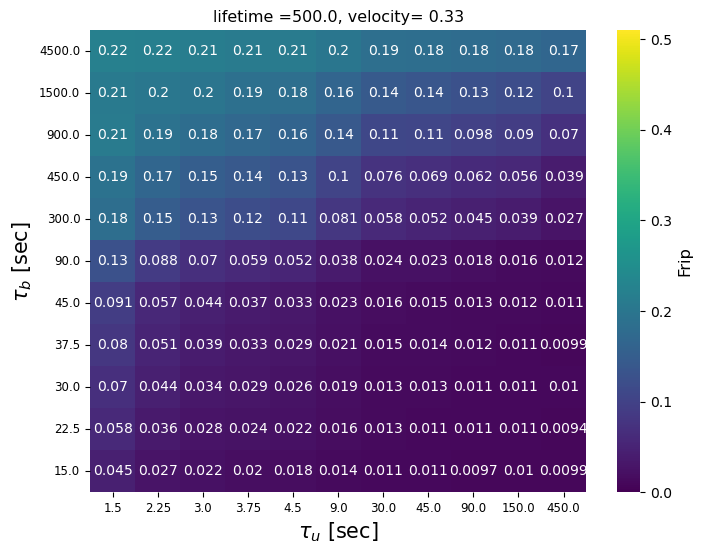

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


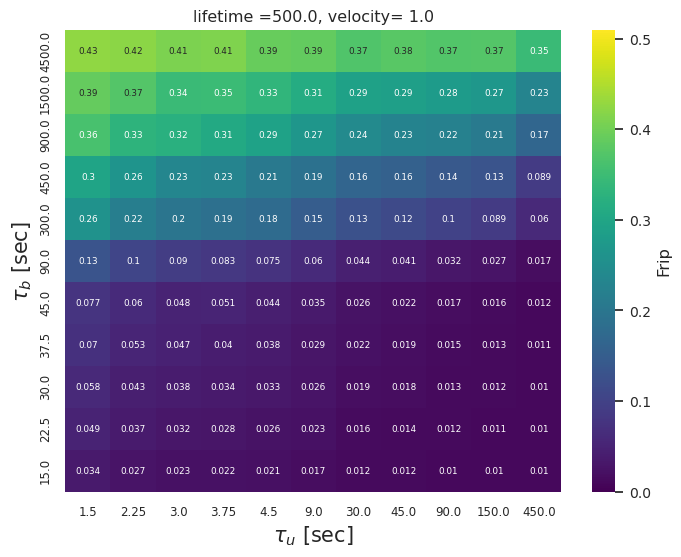

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


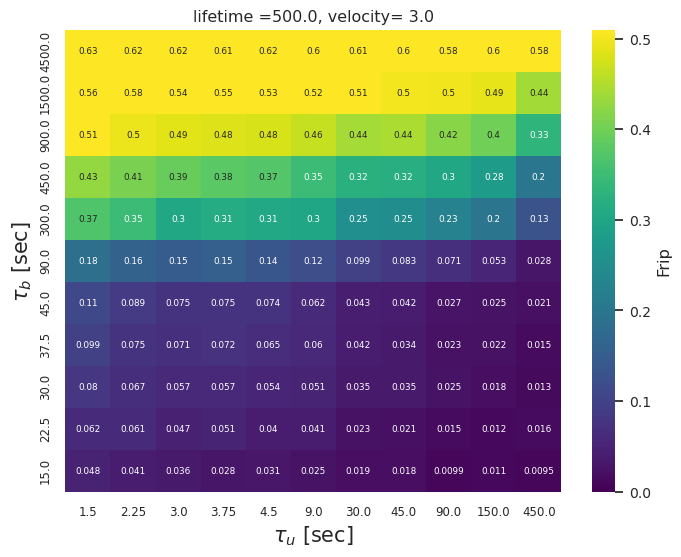

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


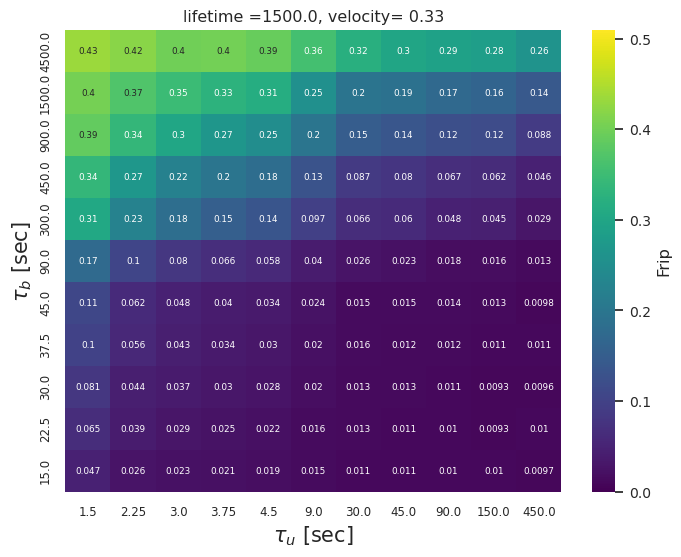

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


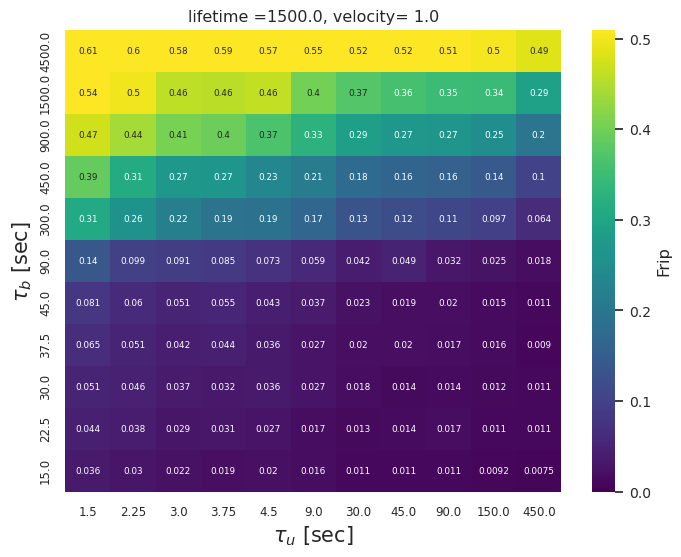

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


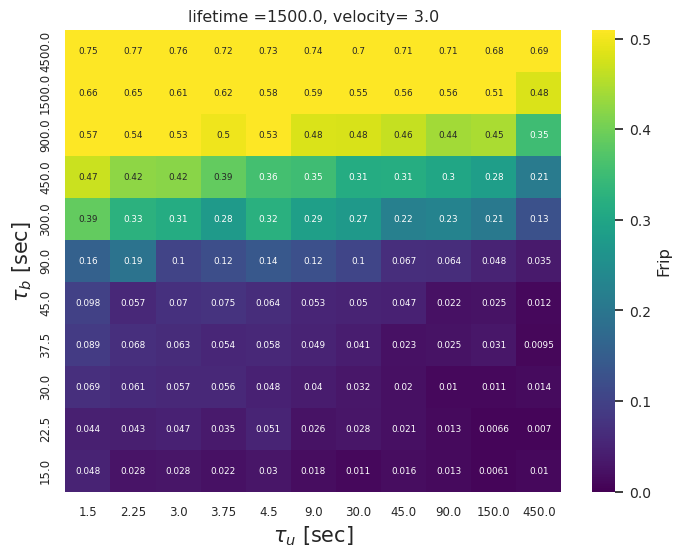

In [4]:
file = pd.read_csv('../../python_codes_calculations/data/frip/fripscore.csv')
file

file = file[(file[' clife']<=1500)&(file[' clife']>4.5)&(file[' cof']>0.3)&(file[' cof']<=150)&(file['lifetime']>300)
            &(file[' clife']!=50)&(file[' cof']!=5)]
convertor = 25*60/500
file[' clife']=file[' clife']*convertor
file[' cof']=file[' cof']*convertor
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

file_100 = file[file['sep']==100.0]

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)

for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file_100[(lifetime == life)&(velocity == vel) ][[' clife',' cof',' fripscore']]
        
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        
        heatmap_data = new_file_filtered.pivot(' clife', ' cof', ' fripscore')
        
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0,vmax=0.51, cbar_kws={'label': 'Frip score'} )
        sns.set(font_scale=0.531)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Frip', fontsize=11.75)
        # Customize 
        plt.xlabel(r'$\tau_u$ [sec]', fontsize = 15)
        plt.xticks(fontsize =8.5)
        plt.ylabel(r'$\tau_b$ [sec]', fontsize =15)
        plt.yticks(fontsize = 8.5)
        plt.title('lifetime =%s, velocity= %s'%(life, vel), fontsize = 11.5)
        plt.gca().invert_yaxis()
        plt.savefig('../../images/fripsweep_for_%s_%s.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()

In [6]:
more_file_filtered=new_file_filtered
more_file_filtered[' occup']=more_file_filtered[' clife']/(more_file_filtered[' clife']+more_file_filtered[' cof'])
more_file_filtered=more_file_filtered[[' clife',' cof',' occup']]
more_file_filtered

,clife,cof,occup
360,30.0,1.50,0.952381
369,30.0,2.25,0.930233
378,30.0,3.00,0.909091
387,30.0,3.75,0.888889
396,30.0,4.50,0.869565
...,...,...,...
3457,22.5,45.00,0.333333
3466,22.5,450.00,0.047619
3475,22.5,9.00,0.714286
3484,22.5,90.00,0.200000


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


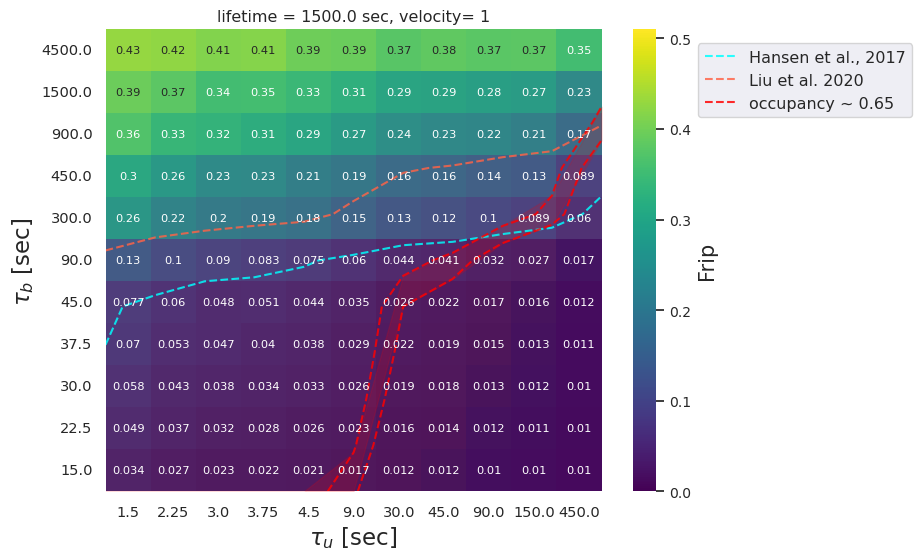

In [9]:
from scipy import ndimage

# Read the data
file = pd.read_csv('../../python_codes_calculations/data/frip/fripscore.csv')

# Filter the data
file = file[(file[' clife'] <= 1500) & (file[' clife'] > 4.5) & (file[' cof'] > 0.3) & (file[' cof'] <= 150) &
            (file['lifetime'] > 300) & (file[' clife'] != 50) & (file[' cof'] != 5)]
convertor = 25 * 60 / 500
file[' clife'] = file[' clife'] * convertor
file[' cof'] = file[' cof'] * convertor
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

file_100 = file[file['sep'] == 100.0]

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)

unique_life = [500]
unique_vel = [1]
for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file_100[(lifetime == life) & (velocity == vel)][[' clife', ' cof', ' fripscore']]
        
        new_file_filtered = new_file.drop_duplicates(keep='first')
        
        heatmap_data = new_file_filtered.pivot(' clife', ' cof', ' fripscore')
        
        smooth_scale = 1
        z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0, vmax=0.51, cbar_kws={'label': 'Frip score'})
        sns.set(font_scale=0.681)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Frip', fontsize=15)
        
        # Add equipotential lines for loop size = 700
        cntr1 = im.contour(np.linspace(0, 11, 11 * smooth_scale),
                           np.linspace(0, 11, 11 * smooth_scale),
                           heatmap_data.to_numpy(), levels=[0.071], colors='cyan', linestyles='dashed', alpha=0.83)
        
        cntr3 = im.contour(np.linspace(0, 11, 11 * smooth_scale),
                           np.linspace(0, 11, 11 * smooth_scale),
                           heatmap_data.to_numpy(), levels=[0.16], colors='tomato', linestyles='dashed', alpha=0.83)
        
        x_cntr1 = np.linspace(0, 11, 11 * smooth_scale)
        y_cntr1 = np.interp(x_cntr1, cntr1.collections[0].get_paths()[0].vertices[:, 0],
                            cntr1.collections[0].get_paths()[0].vertices[:, 1])
        
        x_cntr3 = np.linspace(0, 11, 11 * smooth_scale)
        y_cntr3 = np.interp(x_cntr3, cntr3.collections[0].get_paths()[0].vertices[:, 0],
                            cntr3.collections[0].get_paths()[0].vertices[:, 1])
        
        # Add legend manually for the contours
        hansen_line, = plt.plot([], [], color='cyan', linestyle='dashed', alpha=0.83, label='Hansen et al., 2017')
        Liu_line, = plt.plot([], [], color='tomato', linestyle='dashed', alpha=0.83, label='Liu et al. 2020')
        
        ### occupancy exp det
        new_heatmap_data = more_file_filtered.pivot(' clife', ' cof', ' occup')
        
        smooth_scale = 1
        z = ndimage.zoom(new_heatmap_data.to_numpy(), smooth_scale)
        
        new_im = sns.heatmap(new_heatmap_data, annot=False, cmap='viridis', alpha=0.05, vmin=0.0, vmax=0.3, cbar=None)

        cntr1 = new_im.contour(np.linspace(0, 11, 11 * smooth_scale),
                               np.linspace(0, 11, 11 * smooth_scale),
                               new_heatmap_data.to_numpy(), levels=[0.6], colors='red', linestyles='dashed', alpha=0.83)
        
        cntr3 = new_im.contour(np.linspace(0, 11, 11 * smooth_scale),
                               np.linspace(0, 11, 11 * smooth_scale),
                               new_heatmap_data.to_numpy(), levels=[0.7], colors='red', linestyles='dashed', alpha=0.83)
        occupancy_line, = plt.plot([], [], color='red', linestyle='dashed', alpha=0.83, label='occupancy ~ 0.65')
        
        x_cntr1 = np.linspace(0, 11, 11 * smooth_scale)
        y_cntr1 = np.interp(x_cntr1, cntr1.collections[0].get_paths()[0].vertices[:, 0],
                            cntr1.collections[0].get_paths()[0].vertices[:, 1])
        
        x_cntr3 = np.linspace(0, 11, 11 * smooth_scale)
        y_cntr3 = np.interp(x_cntr3, cntr3.collections[0].get_paths()[0].vertices[:, 0],
                            cntr3.collections[0].get_paths()[0].vertices[:, 1])
        
        plt.fill_between(x_cntr1, y_cntr1, y_cntr3, color='red', alpha=0.15)
        
        plt.xlabel(r'$\tau_u$ [sec]', fontsize=16.5)
        plt.xticks(fontsize=10.5)
        plt.ylabel(r'$\tau_b$ [sec]', fontsize=16.5)
        plt.yticks(fontsize=10.5, rotation=0)
        plt.title('lifetime = %s sec, velocity= %s' % (life * convertor, vel), fontsize=11.5)
        plt.gca().invert_yaxis()
        
        # Add legend
        plt.legend(handles=[hansen_line, Liu_line, occupancy_line], loc=(1.195,0.81), fontsize =11.5)
        
        plt.savefig('../../images/fripsweep_for_%s_%s_estimated_exp.pdf' % (life, vel), transparent=True, bbox_inches='tight')
        plt.show()


### FRiP at higher separations

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


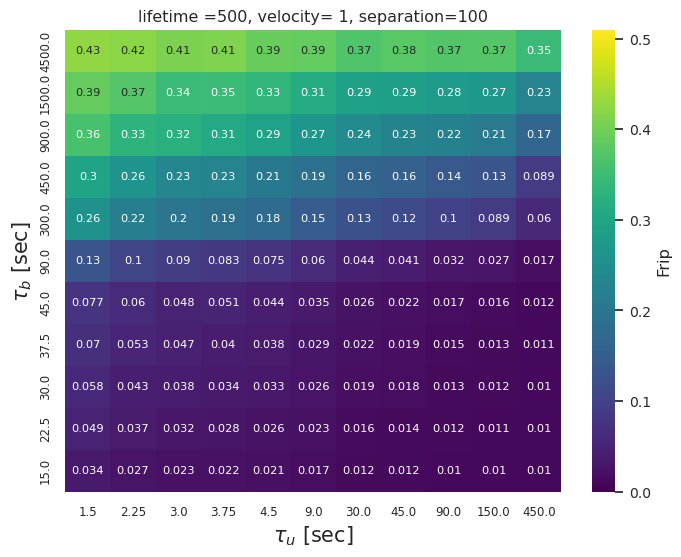

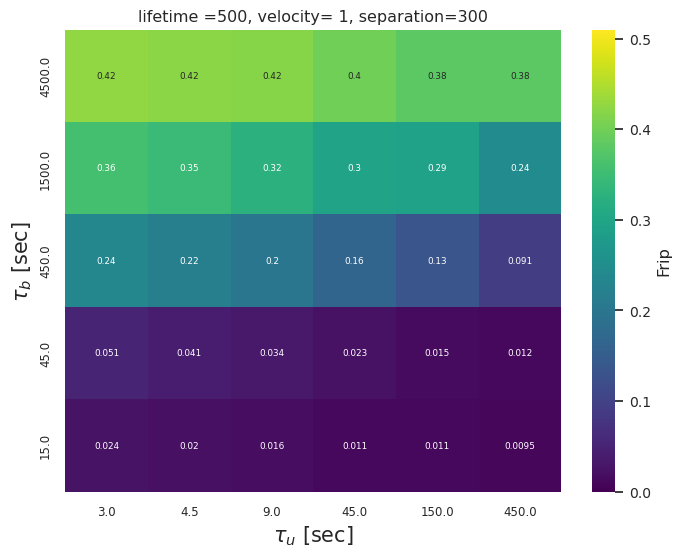

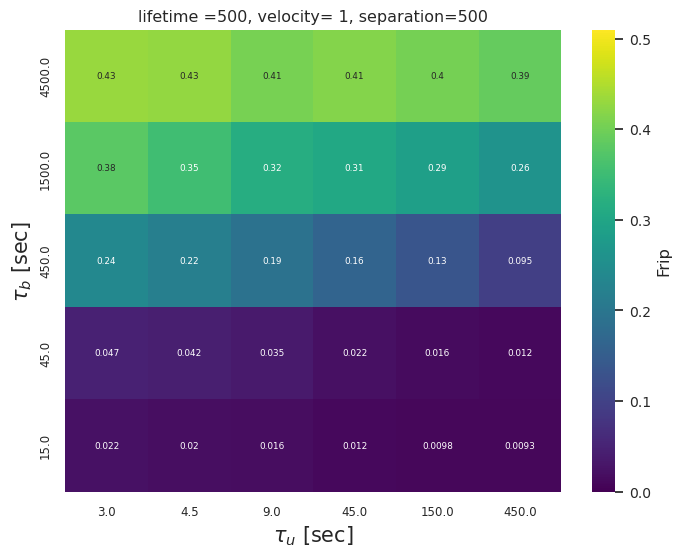

In [11]:
file = pd.read_csv('../../python_codes_calculations/data/frip/fripscore.csv')
file

file = file[(file[' clife']<=1500)&(file[' clife']>4.5)&(file[' cof']>0.3)&(file[' cof']<=150)&(file['lifetime']>300)
            &(file[' clife']!=50)&(file[' cof']!=5)]
convertor = 25*60/500
file[' clife']=file[' clife']*convertor
file[' cof']=file[' cof']*convertor
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)

unique_vel=[1]
unique_life=[500]
unique_sep = [100, 300, 500]
for life in list(unique_life):
    for vel in list(unique_vel):
        for sep in list(unique_sep):
            file_s = file[file['sep']==sep]
            new_file = file_s[(lifetime == life)&(velocity == vel) ][[' clife',' cof',' fripscore']]
            
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            
            heatmap_data = new_file_filtered.pivot(' clife', ' cof', ' fripscore')
            
            
            # Create the heatmap using seaborn
            plt.figure(figsize=(8, 6))
            im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0,vmax=0.51, cbar_kws={'label': 'Frip score'} )
            sns.set(font_scale=0.531)
            cbar = im.collections[0].colorbar
            cbar.ax.tick_params(labelsize=10)
            cbar.set_label('Frip', fontsize=11.75)
            # Customize 
            plt.xlabel(r'$\tau_u$ [sec]', fontsize = 15)
            plt.xticks(fontsize =8.5)
            plt.ylabel(r'$\tau_b$ [sec]', fontsize =15)
            plt.yticks(fontsize = 8.5)
            plt.title('lifetime =%s, velocity= %s, separation=%s'%(life, vel, sep), fontsize = 11.5)
            plt.gca().invert_yaxis()
            #plt.savefig('../images/fripsweep_for_%s_%s.png'%(life, vel), transparent = True, bbox_inches = 'tight')
            plt.show()

In [12]:
file = pd.read_csv('../../data/new_loop_sizes_averaged_sep_300.csv')
file = file[(file['clife']<=15000)&(file['clife']>3)&(file['cof']>=0.15)&(file['cof']<1600)]
file
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
sep = file['sep']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
print(unique_cof)

[1.0e+00 1.5e+00 3.0e+00 5.0e+00 1.5e+01 5.0e+01 1.5e+02 5.0e+02 1.5e+03]


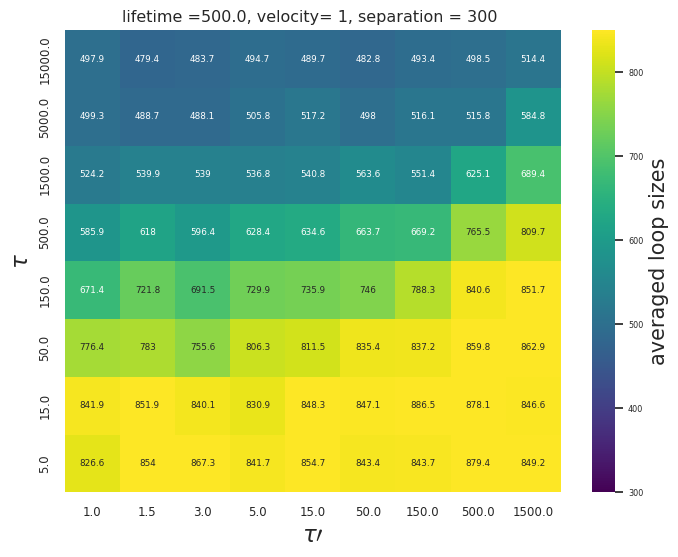

In [13]:
import seaborn as sns


for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][['clife','cof','loopmean']]
        
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        
        heatmap_data = new_file_filtered.pivot('clife', 'cof', 'loopmean')
        
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis',vmin=300,vmax=850,  fmt='.4g',cbar_kws={'label': 'Frip score'} )
        sns.set(font_scale=0.631)
        
        # Customize 
        cbar = im.collections[0].colorbar
        cbar.set_label('averaged loop sizes', fontsize=15) 
        plt.xlabel(r'$\tau\prime$', fontsize = 16.5)
        plt.xticks(fontsize =8.5)
        plt.ylabel(r'$\tau$', fontsize =16.5)
        plt.yticks(fontsize = 8.5)
        plt.title('lifetime =%s, velocity= %s, separation = 300 '%(life, vel), fontsize = 11.5)
        plt.gca().invert_yaxis()
        #plt.savefig('images/frip_for_%s_%s.png'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()

In [14]:
file = pd.read_csv('../../data/new_loop_sizes_averaged_sep_500.csv')
file = file[(file['clife']<=15000)&(file['clife']>3)&(file['cof']>=0.15)&(file['cof']<1600)]
file
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
sep = file['sep']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
print(unique_cof)

[1.0e+00 1.5e+00 3.0e+00 5.0e+00 1.5e+01 5.0e+01 1.5e+02 5.0e+02 1.5e+03]


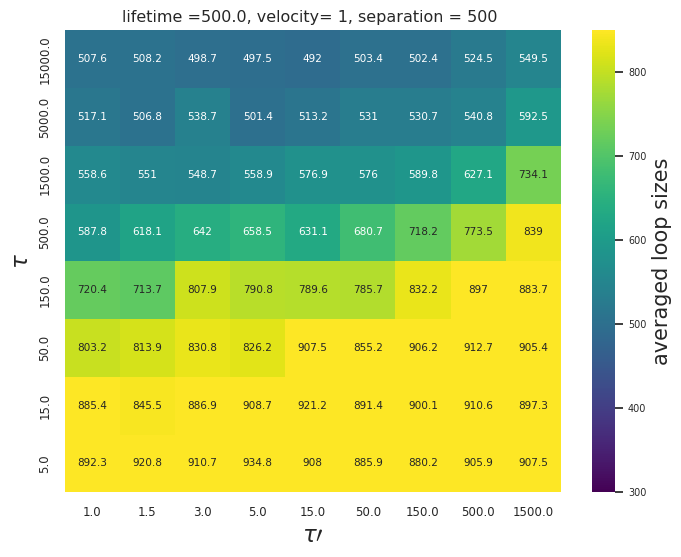

In [15]:
for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][['clife','cof','loopmean']]
        
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        
        heatmap_data = new_file_filtered.pivot('clife', 'cof', 'loopmean')
        
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis',vmin=300,vmax=850,  fmt='.4g',cbar_kws={'label': 'Frip score'} )
        sns.set(font_scale=0.631)
        
        # Customize 
        cbar = im.collections[0].colorbar
        cbar.set_label('averaged loop sizes', fontsize=15) 
        plt.xlabel(r'$\tau\prime$', fontsize = 16.5)
        plt.xticks(fontsize =8.5)
        plt.ylabel(r'$\tau$', fontsize =16.5)
        plt.yticks(fontsize = 8.5)
        plt.title('lifetime =%s, velocity= %s, separation = 500 '%(life, vel), fontsize = 11.5)
        plt.gca().invert_yaxis()
        #plt.savefig('images/frip_for_%s_%s.png'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()

### heat maps of Frip and occupancy rate

In [17]:
file = pd.read_csv('../../python_codes_calculations/data/frip/fripscore.csv')
file

,lifetime,velocity,clife,cof,sep,fripscore
0,1500.0,0.33,1.0,0.1,100,0.442518
1,1500.0,1.00,1.0,0.1,100,0.668242
2,1500.0,3.00,1.0,0.1,100,0.041536
3,166.0,0.33,1.0,0.1,100,0.090074
4,166.0,1.00,1.0,0.1,100,0.221134
...,...,...,...,...,...,...
3495,166.0,1.00,7.5,50.0,100,0.011380
3496,166.0,3.00,7.5,50.0,100,0.013301
3497,500.0,0.33,7.5,50.0,100,0.010514
3498,500.0,1.00,7.5,50.0,100,0.010953


In [18]:
file ['occupancy']=(file[' clife']/(file[' clife']+file[' cof'])).round(2)


### sorted occup vs binding time

In [19]:
file = pd.read_csv('../../python_codes_calculations/data/frip/fripscore.csv')


file = file[file[' cof']>=0.15]


file ['occupancy']=(file[' clife']/(file[' clife']+file[' cof'])).round(2)

In [20]:
convertor = 1#25*60/500
file[' clife']=file[' clife']
file[' cof']=file[' cof']
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
occupancy = file['occupancy']

file_100 = file[file['sep']==100.0]

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occup = np.unique(occupancy)

In [21]:
bins = [0.05, 0.15, 0.35, 0.65, 0.85, 0.93, 1.0]

labels = [0.10, 0.25, 0.5,  0.75, 0.93, 0.97]

file_100 = file_100[(file_100['occupancy']!=0)&(file_100[' clife']>=3)&(file_100[' clife']!=30.0)
            &(file_100[' clife']!=300.0)&(file_100[' clife']!=100.0)
            &(file_100[' clife']<=5000)]


In [22]:
new_file_filtered_unique = file_100[(lifetime == life)&(velocity == vel) ][[' clife','occupancy',' fripscore']]

new_file_filtered_unique['occupancy_bin'] = pd.cut(new_file_filtered_unique['occupancy'], bins=bins, labels=labels, right=False)

dtaframe = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
dtafram = dtaframe.dropna()
dtaframe = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
dtaframe_grouped = dtaframe.groupby([' clife', 'occupancy_bin'], as_index=False).mean()
dtaframe_grouped = dtaframe.dropna()
dtaframe_grouped

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,clife,occupancy_bin,fripscore
347,10.0,0.97,0.137155
356,10.0,0.97,0.086628
365,10.0,0.97,0.058271
374,10.0,0.97,0.042942
383,10.0,0.93,0.037867
...,...,...,...
3462,7.5,0.25,0.013934
3471,7.5,0.10,0.010306
3480,7.5,0.75,0.022653
3489,7.5,0.25,0.012097


/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


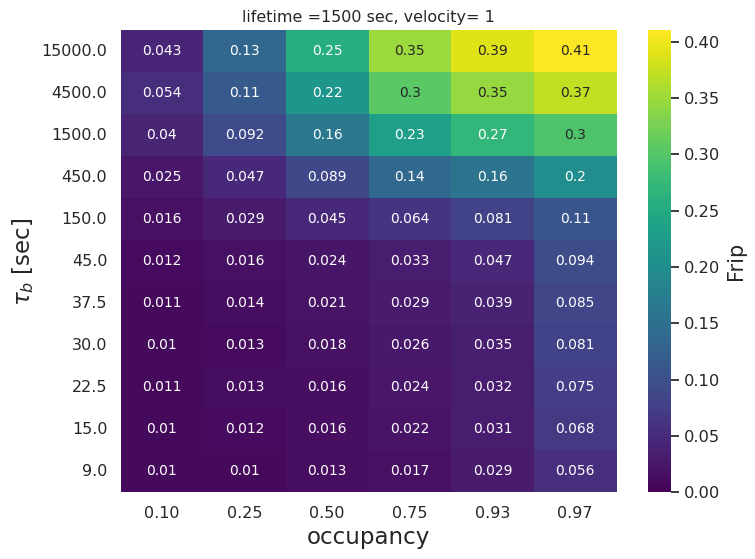

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


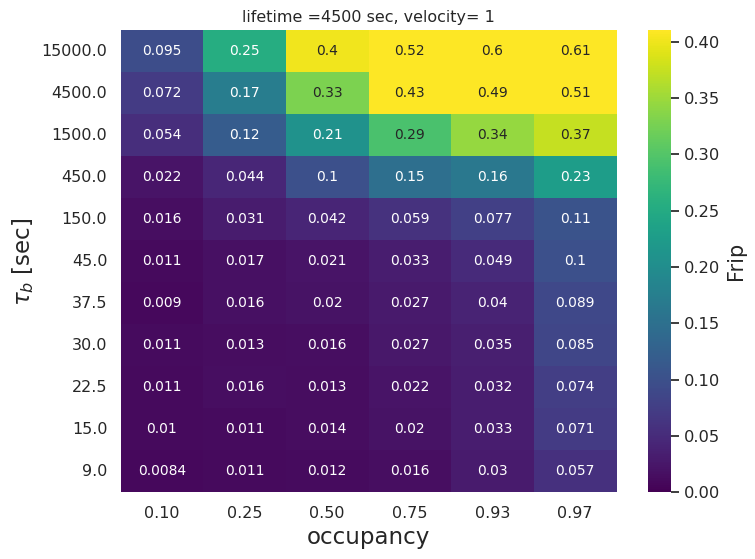

In [24]:
list_life, list_vel = [500, 1500], [1]
for life in list(list_life):
    for vel in list(list_vel):
        new_file_filtered_unique = file_100[(lifetime == life)&(velocity == vel) ][[' clife','occupancy',' fripscore']]

        new_file_filtered_unique['occupancy_bin'] = pd.cut(new_file_filtered_unique['occupancy'], bins=bins, labels=labels, right=False)

        dtaframe = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
        new_file_filtered_unique = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
        # Remove any NaN values
        new_file_filtered_unique = new_file_filtered_unique.dropna()
        
        # Group by ' clife' and 'occupancy_bin', and calculate the mean of ' fripscore'
        dtaframe_grouped = new_file_filtered_unique.groupby([' clife', 'occupancy_bin'], as_index=False).mean()
        convertor = 3
        dtaframe_grouped [' clife']= dtaframe_grouped[' clife']*convertor
        heatmap_data = dtaframe_grouped.pivot(' clife', 'occupancy_bin', ' fripscore')
                
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0,vmax=0.41, cbar_kws={'label': 'Frip score'} )
        sns.set(font_scale=0.831)
        cbar = im.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11.75)
        cbar.set_label('Frip', fontsize=15)
        
        im.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in im.get_xticklabels()])
        ytick_labels = [int(float(t.get_text())) for t in im.get_yticklabels()]
        plt.xlabel(r'occupancy', fontsize = 16.5)
        plt.xticks(fontsize =11.5, rotation=0)
        plt.ylabel(r'$\tau_b$ [sec]', fontsize =16.5)
        plt.yticks(fontsize = 11.5, rotation = 0)
        plt.title('lifetime =%s sec, velocity= %s'%(life*convertor, vel), fontsize = 11.5)
        plt.gca().invert_yaxis()
        plt.savefig('../../images/fripsweep_for_occupancy_%s_%s.pdf'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()

In [26]:
file = pd.read_csv('../../python_codes_calculations/data/frip/fripscore.csv')


file = file[file[' cof']>=0.15]


file ['occupancy']=(file[' clife']/(file[' clife']+file[' cof'])).round(2)

In [27]:
convertor = 1#25*60/500
file[' clife']=file[' clife']
file[' cof']=file[' cof']
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
occupancy = file['occupancy']

file_100 = file[file['sep']==100.0]

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
unique_occup = np.unique(occupancy)

In [28]:
bins = [0.05, 0.15, 0.35, 0.65, 0.85, 0.93, 1.0]

labels = [0.10, 0.25, 0.5,  0.75, 0.93, 0.97]

file_100 = file_100[(file_100['occupancy']!=0)&(file_100[' clife']>=0)&(file_100[' clife']!=30.0)
            &(file_100[' clife']!=300.0)&(file_100[' clife']!=100.0)
            &(file_100[' clife']<=50000)]


In [29]:
new_file_filtered_unique = file_100[(lifetime == life)&(velocity == vel) ][[' clife','occupancy',' fripscore']]

new_file_filtered_unique['occupancy_bin'] = pd.cut(new_file_filtered_unique['occupancy'], bins=bins, labels=labels, right=False)

dtaframe = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
dtafram = dtaframe.dropna()
dtaframe = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
dtaframe_grouped = dtaframe.groupby([' clife', 'occupancy_bin'], as_index=False).mean()
dtaframe_grouped = dtaframe.dropna()
dtaframe_grouped

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,clife,occupancy_bin,fripscore
10,1.0,0.75,0.027485
19,1.0,0.75,0.022447
28,1.0,0.75,0.013726
37,1.0,0.50,0.010247
46,1.0,0.50,0.008941
...,...,...,...
3456,7.5,0.25,0.014022
3465,7.5,0.10,0.011057
3474,7.5,0.75,0.017092
3483,7.5,0.25,0.016990


In [30]:
num_plot =10
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)
colors=list(colors)
colors.reverse()
sns.reset_defaults()

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


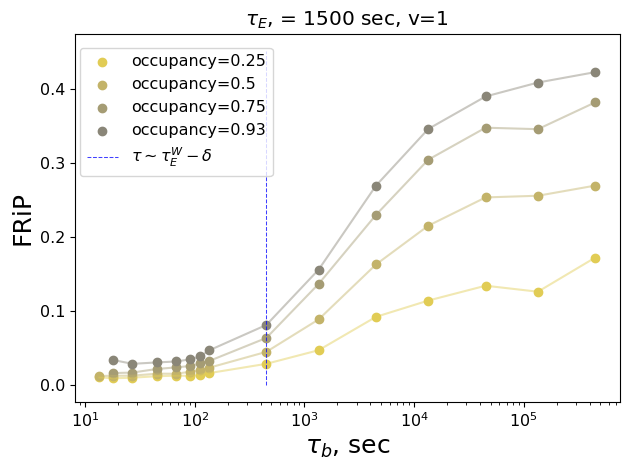

In [31]:
lifes, vels = [500] , [1]

#occupancy=file[' occupancy']
list_occup = [ 0.91, 0.75, 0.67, 0.5, ]
convertor = 25*60/500
#list_occup=[0.67]
i=1
list_occup = np.unique(dtaframe_grouped['occupancy_bin'])
for life in lifes:
    for vel in vels:
        for occup in list_occup[1:5]:
            if (life==1500 and vel==3): continue
            new_file_filtered_unique = file_100[(lifetime == life)&(velocity == vel) ][[' clife','occupancy',' fripscore']]

            new_file_filtered_unique['occupancy_bin'] = pd.cut(new_file_filtered_unique['occupancy'], bins=bins, labels=labels, right=False)
    
            dtaframe = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
            new_file_filtered_unique = new_file_filtered_unique[[' clife', 'occupancy_bin', ' fripscore']]
            # Remove any NaN values
            new_file_filtered_unique = new_file_filtered_unique.dropna()
            
            # Group by ' clife' and 'occupancy_bin', and calculate the mean of ' fripscore'
            dtaframe_grouped = new_file_filtered_unique.groupby([' clife', 'occupancy_bin'], as_index=False).mean()
            convertor = 3
            dtaframe_grouped [' clife']= dtaframe_grouped[' clife']*convertor

            file = dtaframe_grouped
            file = file[file['occupancy_bin']==occup]
            new_file = file[[' clife', ' fripscore']]
            #print('occupancy is %s'%occup,new_file)
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' clife')
            new_clife = new_file_filtered[' clife']
            
            frip_score = new_file_filtered[' fripscore']
            #print(new_file)
            plt.scatter(new_clife[1:]*convertor, frip_score[1:], color=colors[i],label=r'occupancy=%s'%(occup))
            plt.plot(new_clife[1:]*convertor, frip_score[1:], color=colors[i],alpha = 0.45)
            i+=1

life_w = 500*convertor
delta = 350*convertor
#plt.plot([life_w, life_w, life_w],[0,0.5,0.71],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau^W_E$')
plt.plot([life_w-delta, life_w-delta, life_w-delta],[0,0.3,0.451],'--', color = 'blue',
         alpha = 0.75, linewidth = 0.75, label = r'$\tau$$\sim$$\tau^W_E-\delta$')
plt.xlim()
plt.title(r'$\tau_E$, = %s sec, v=1'%(life*convertor),fontsize=14.5)
plt.xscale('log')
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
plt.legend(fontsize = 11.51,loc = (0.01,0.615))
plt.ylabel('FRiP',fontsize = 18)
plt.xlabel(r'$\tau_b$, sec', fontsize = 18)
plt.tight_layout()
#plt.savefig('../images/frip_for_tau.pdf',transparent=True)

plt.show()
        